In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12, 12)

In [2]:
temperature = 'airTemperature'
humidity = 'humidity'

In [3]:
df_temperature = pd.read_csv("data/Air Temperature 2024-11-24 20 28.csv", skiprows=3, skipfooter=3, engine='python')
df_humidity = pd.read_csv("data/Humidity 2024-11-24 20 28.csv", skiprows=3, skipfooter=3, engine='python')
df_temperature

,Unnamed: 0,result,table,_start,_stop,_time,_value,_field,_measurement
0,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-10-25T12:29:00Z,NaN,airTemperature,first
1,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-10-25T12:30:00Z,NaN,airTemperature,first
2,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-10-25T12:31:00Z,NaN,airTemperature,first
3,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-10-25T12:32:00Z,NaN,airTemperature,first
4,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-10-25T12:33:00Z,NaN,airTemperature,first
...,...,...,...,...,...,...,...,...,...
43194,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-11-24T12:23:00Z,27.811429,airTemperature,first
43195,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-11-24T12:24:00Z,27.800000,airTemperature,first
43196,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-11-24T12:25:00Z,27.800000,airTemperature,first
43197,NaN,NaN,0,2024-10-25T12:28:29.143659784Z,2024-11-24T12:28:29.143659784Z,2024-11-24T12:26:00Z,27.800000,airTemperature,first


In [4]:
df_temperature = df_temperature[['_time', '_value']]
df_humidity = df_humidity[['_time', '_value']]
df_temperature

,_time,_value
0,2024-10-25T12:29:00Z,NaN
1,2024-10-25T12:30:00Z,NaN
2,2024-10-25T12:31:00Z,NaN
3,2024-10-25T12:32:00Z,NaN
4,2024-10-25T12:33:00Z,NaN
...,...,...
43194,2024-11-24T12:23:00Z,27.811429
43195,2024-11-24T12:24:00Z,27.800000
43196,2024-11-24T12:25:00Z,27.800000
43197,2024-11-24T12:26:00Z,27.800000


In [5]:
df_temperature = df_temperature.rename(columns={'_time': 'datetime', '_value': f'{temperature}'})
df_humidity = df_humidity.rename(columns={'_time': 'datetime', '_value': f'{humidity}'})
df_temperature

,datetime,airTemperature
0,2024-10-25T12:29:00Z,NaN
1,2024-10-25T12:30:00Z,NaN
2,2024-10-25T12:31:00Z,NaN
3,2024-10-25T12:32:00Z,NaN
4,2024-10-25T12:33:00Z,NaN
...,...,...
43194,2024-11-24T12:23:00Z,27.811429
43195,2024-11-24T12:24:00Z,27.800000
43196,2024-11-24T12:25:00Z,27.800000
43197,2024-11-24T12:26:00Z,27.800000


In [6]:
df_temperature['datetime'] = pd.to_datetime(df_temperature['datetime'])
df_humidity['datetime'] = pd.to_datetime(df_humidity['datetime'])
df_temperature

,datetime,airTemperature
0,2024-10-25 12:29:00+00:00,NaN
1,2024-10-25 12:30:00+00:00,NaN
2,2024-10-25 12:31:00+00:00,NaN
3,2024-10-25 12:32:00+00:00,NaN
4,2024-10-25 12:33:00+00:00,NaN
...,...,...
43194,2024-11-24 12:23:00+00:00,27.811429
43195,2024-11-24 12:24:00+00:00,27.800000
43196,2024-11-24 12:25:00+00:00,27.800000
43197,2024-11-24 12:26:00+00:00,27.800000


In [7]:
df_temperature = df_temperature.set_index('datetime').asfreq('1min')
df_humidity = df_humidity.set_index('datetime').asfreq("1min")
df_temperature

,airTemperature
datetime,
2024-10-25 12:29:00+00:00,NaN
2024-10-25 12:30:00+00:00,NaN
2024-10-25 12:31:00+00:00,NaN
2024-10-25 12:32:00+00:00,NaN
2024-10-25 12:33:00+00:00,NaN
...,...
2024-11-24 12:23:00+00:00,27.811429
2024-11-24 12:24:00+00:00,27.800000
2024-11-24 12:25:00+00:00,27.800000


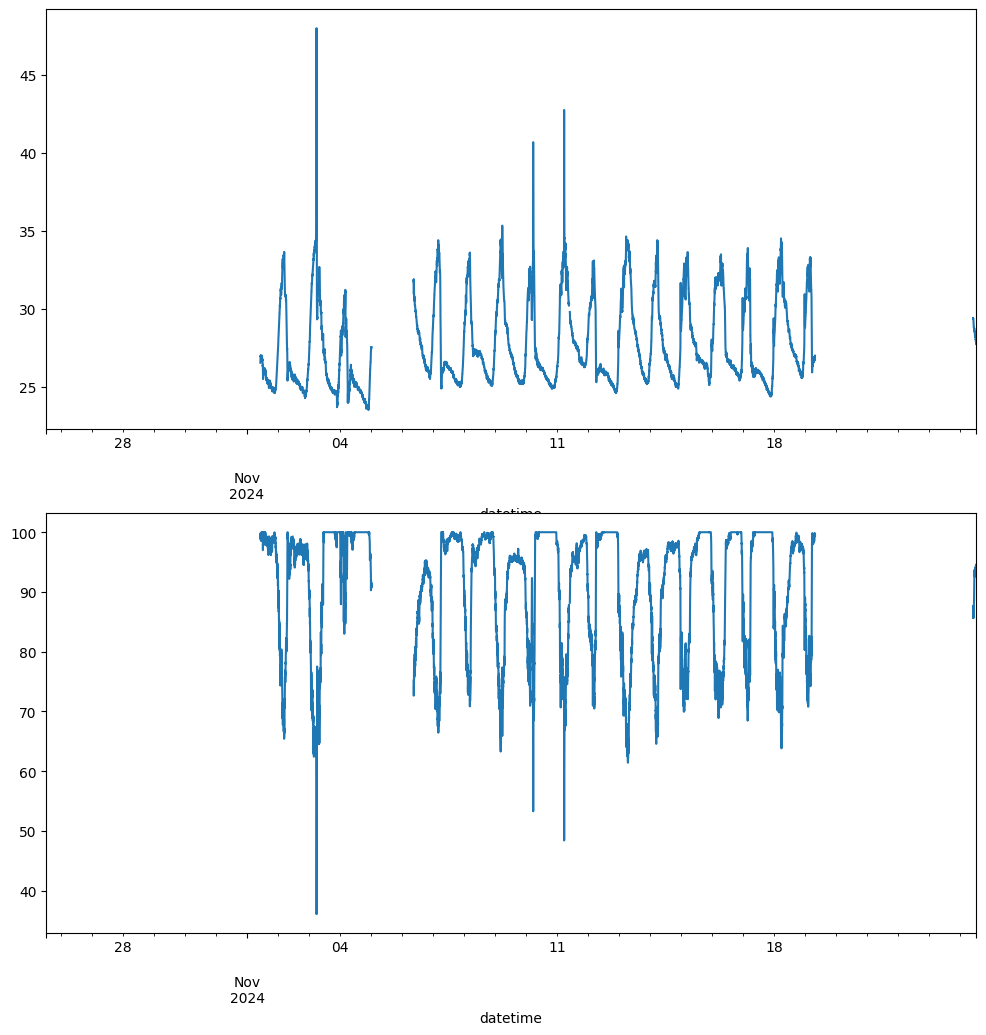

In [8]:
fig, ax = plt.subplots(2, 1)
df_temperature[f'{temperature}'].plot(ax=ax[0])
df_humidity[f'{humidity}'].plot(ax=ax[1])
plt.show()

In [9]:
df_temperature = df_temperature.loc[df_temperature.index >= '2024-11-01 10:21']
df_humidity = df_humidity.loc[df_humidity.index >= '2024-11-01 10:21']
# df = df.loc[df.index <= '2024-11-19 07:45']
df_temperature

,airTemperature
datetime,
2024-11-01 10:21:00+00:00,26.550000
2024-11-01 10:22:00+00:00,26.600000
2024-11-01 10:23:00+00:00,26.600000
2024-11-01 10:24:00+00:00,26.651429
2024-11-01 10:25:00+00:00,26.700000
...,...
2024-11-24 12:23:00+00:00,27.811429
2024-11-24 12:24:00+00:00,27.800000
2024-11-24 12:25:00+00:00,27.800000


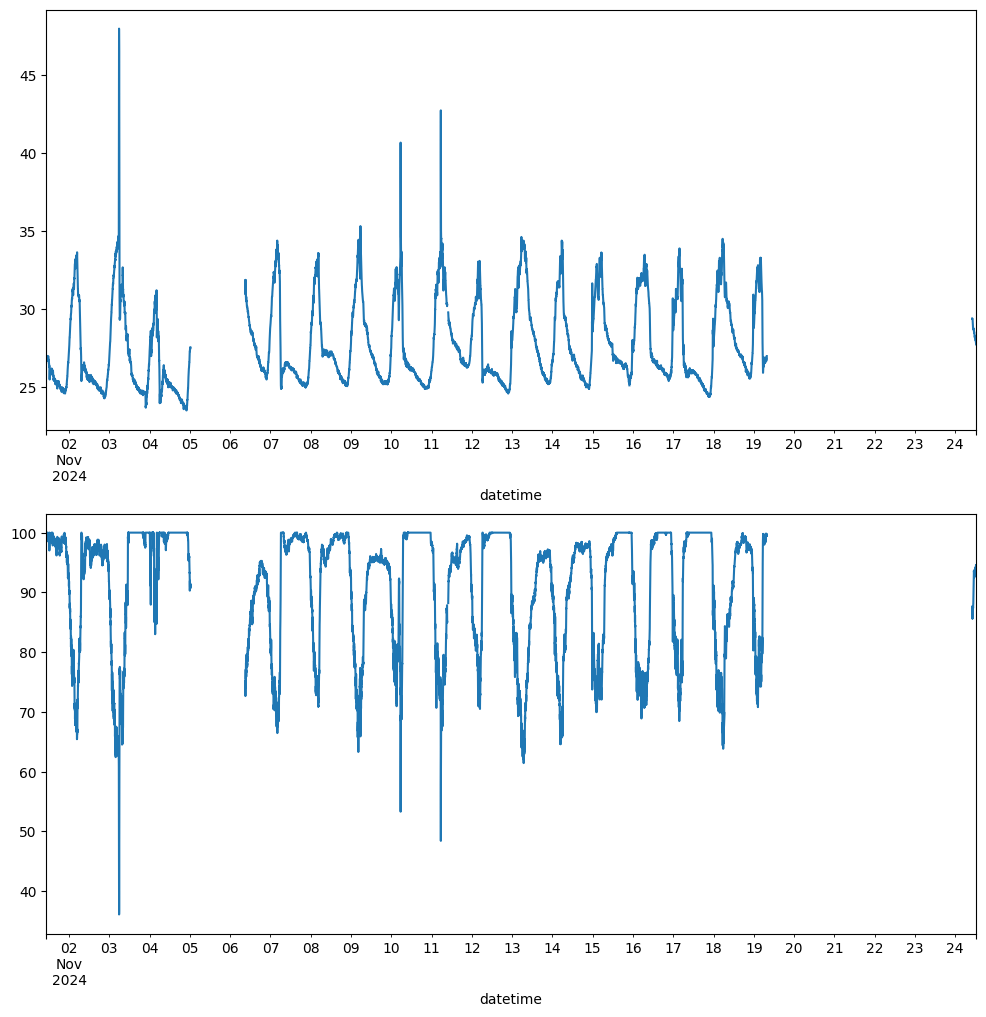

In [10]:
fig, ax = plt.subplots(2, 1)
df_temperature[f'{temperature}'].plot(ax=ax[0])
df_humidity[f'{humidity}'].plot(ax=ax[1])
plt.show()

In [11]:
df_temperature = df_temperature.round({f'{temperature}': 2})
df_humidity = df_humidity.round({f'{humidity}': 2})
df_temperature

,airTemperature
datetime,
2024-11-01 10:21:00+00:00,26.55
2024-11-01 10:22:00+00:00,26.60
2024-11-01 10:23:00+00:00,26.60
2024-11-01 10:24:00+00:00,26.65
2024-11-01 10:25:00+00:00,26.70
...,...
2024-11-24 12:23:00+00:00,27.81
2024-11-24 12:24:00+00:00,27.80
2024-11-24 12:25:00+00:00,27.80


<Axes: ylabel='airTemperature'>

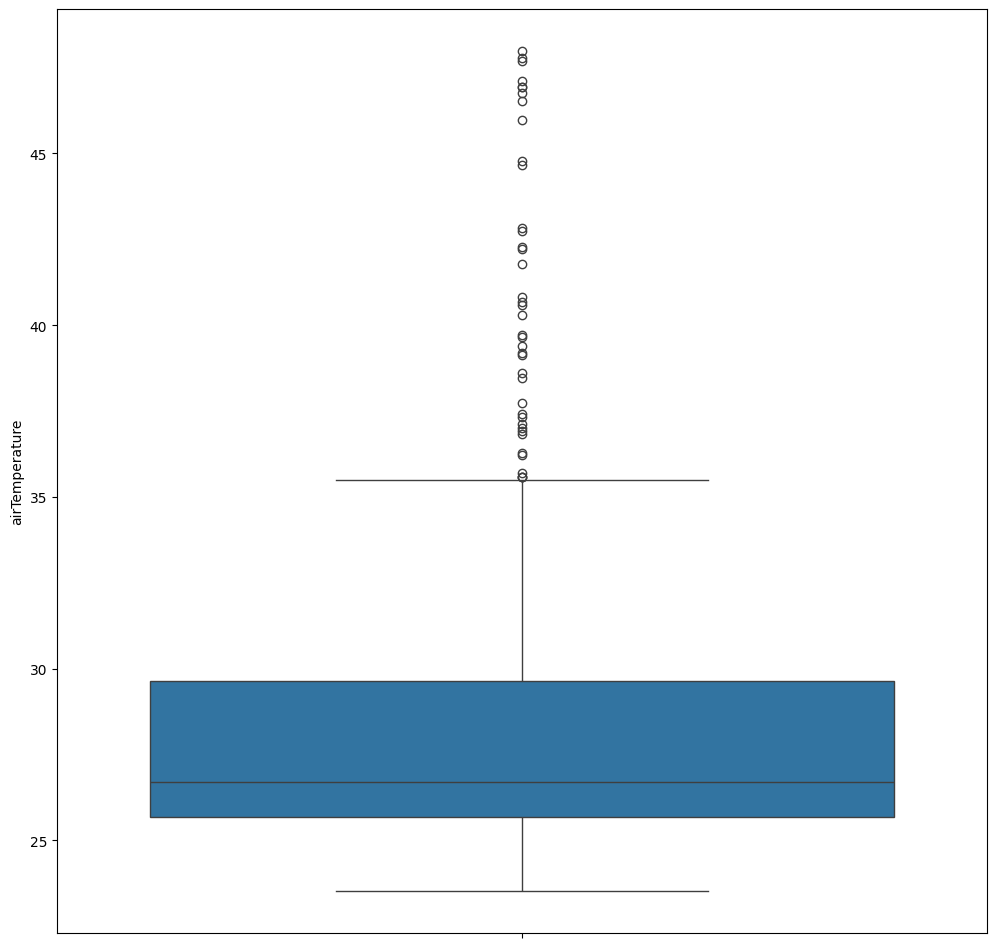

In [12]:
sns.boxplot(data=df_temperature, y=f'{temperature}')

In [13]:
q1, q3 = df_temperature[f'{temperature}'].quantile(0.25), df_temperature[f'{temperature}'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [14]:
df_temperature[f'{temperature}'].loc[df_temperature[f'{temperature}'] > upper_limit] = upper_limit
df_temperature[f'{temperature}'].loc[df_temperature[f'{temperature}'] < lower_limit] = lower_limit

<Axes: ylabel='airTemperature'>

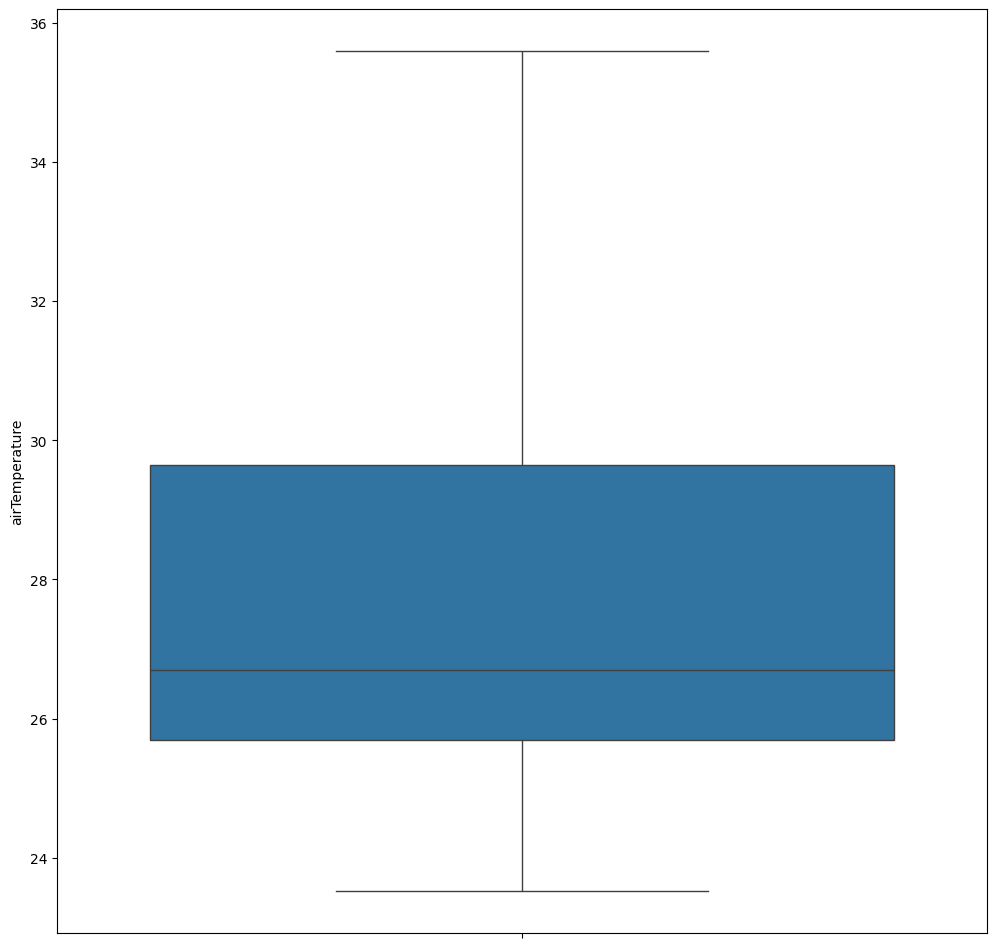

In [15]:
sns.boxplot(df_temperature, y=f'{temperature}')

<Axes: ylabel='humidity'>

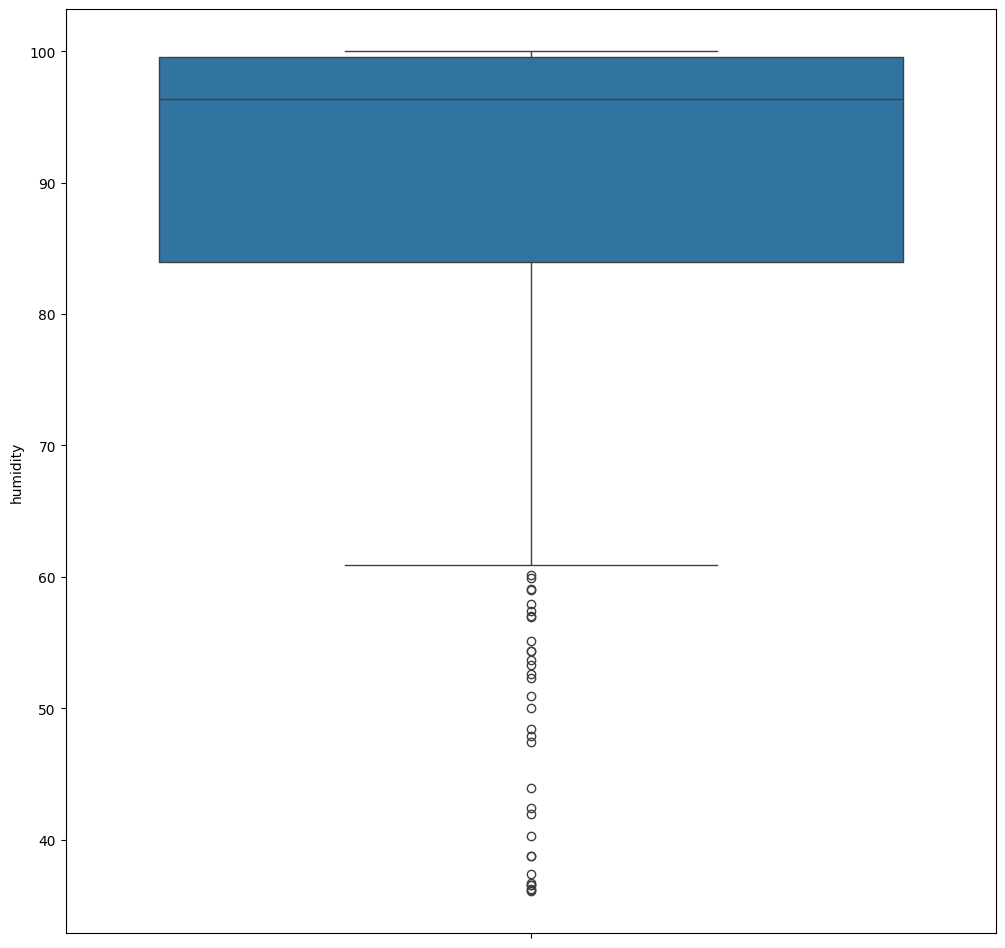

In [16]:
sns.boxplot(data=df_humidity, y=f'{humidity}')

In [17]:
q1, q3 = df_humidity[f'{humidity}'].quantile(0.25), df_humidity[f'{humidity}'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

In [18]:
df_humidity[f'{humidity}'].loc[df_humidity[f'{humidity}'] > upper_limit] = upper_limit
df_humidity[f'{humidity}'].loc[df_humidity[f'{humidity}'] < lower_limit] = lower_limit

<Axes: ylabel='humidity'>

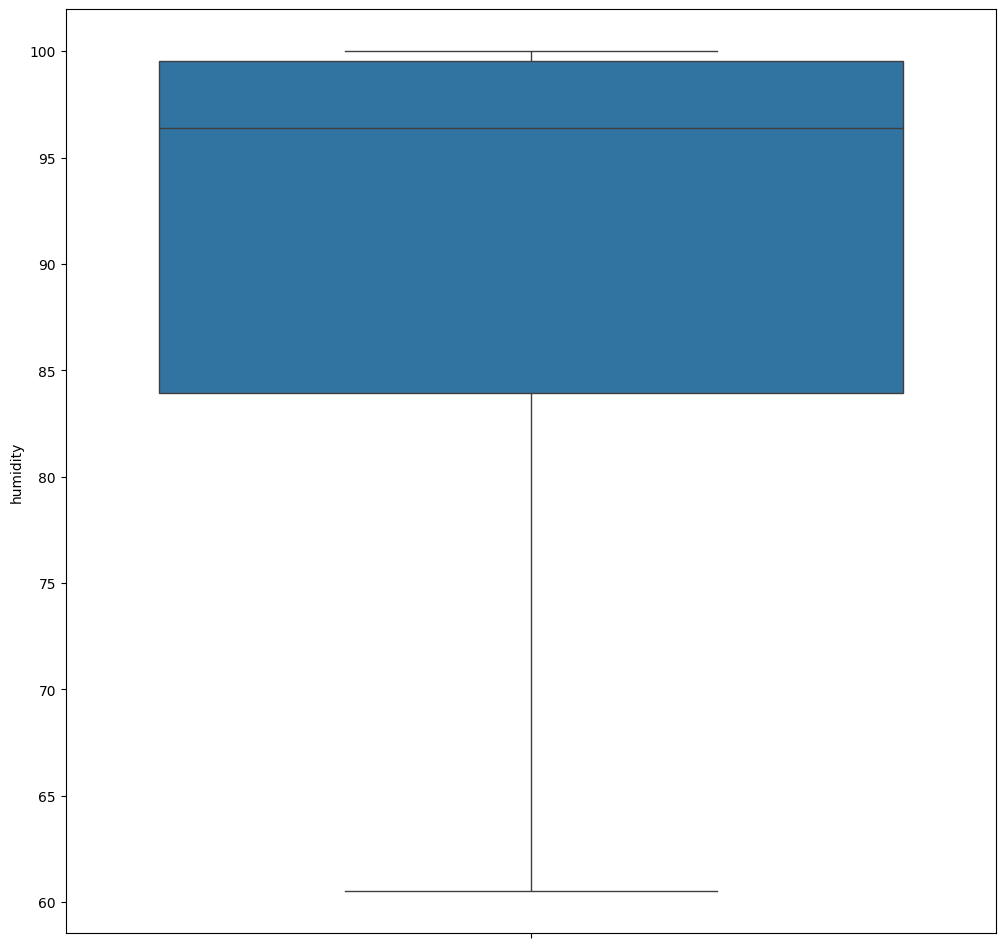

In [19]:
sns.boxplot(data=df_humidity, y=f'{humidity}')

In [20]:
print(f'Number data NaN\t: {df_temperature.isna().sum()}')
print(f'Number data NaN\t: {df_humidity.isna().sum()}')

Number data NaN	: airTemperature    9363
dtype: int64
Number data NaN	: humidity    9363
dtype: int64


In [21]:
df_temperature.describe()

,airTemperature
count,23884.000000
mean,27.738294
std,2.676922
min,23.520000
25%,25.690000
50%,26.700000
75%,29.650000
max,35.590000


In [22]:
def fillna(df, column_name):
    # Get mean HH:MM
    resampled_df = df.copy()
    resampled_df = resampled_df.resample('min').mean()
    resampled_df['datetime'] = resampled_df.index
    resampled_df['hour_minutes'] = resampled_df['datetime'].dt.strftime('%H:%M')
    resampled_df = resampled_df.groupby('hour_minutes').mean()
    resampled_df = resampled_df.drop(columns=['datetime'])
    resampled_df = resampled_df.round({f'{column_name}': 2})
    
    # Fill NaN with mean HH:MM
    df_fillna = df.copy()
    df_fillna['hour_minutes'] = df_fillna.index.strftime('%H:%M')
    df_fillna[f'{column_name}'] = df_fillna.apply(
        lambda row: row[f'{column_name}'] if pd.notnull(row[f'{column_name}']) else resampled_df.loc[row['hour_minutes'], f'{column_name}'], 
        axis=1
    )
    df_fillna = df_fillna.drop(columns=['hour_minutes'])

    # return DataFrame
    return df_fillna

df_temperature = fillna(df_temperature, temperature)
df_humidity = fillna(df_humidity, humidity)

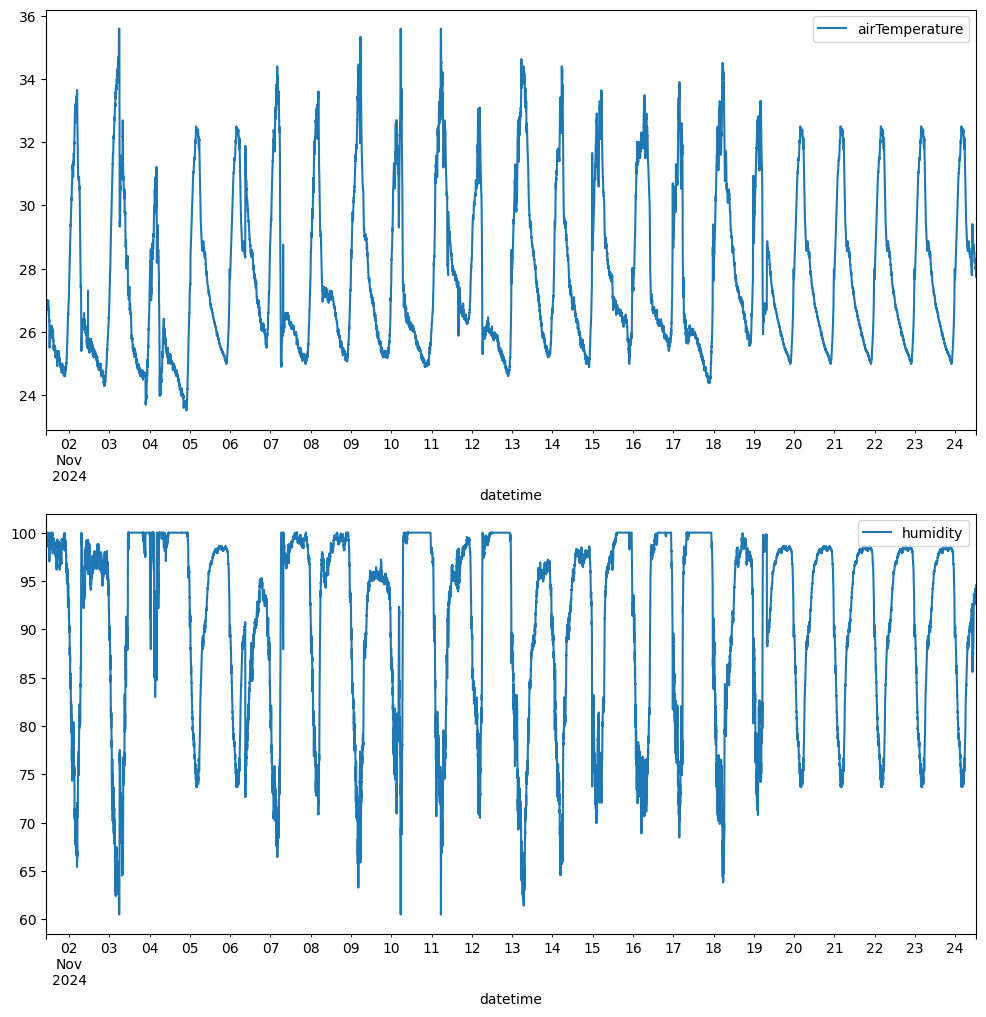

In [23]:
fig, ax = plt.subplots(2, 1)
df_temperature.plot(ax=ax[0])
df_humidity.plot(ax=ax[1])
plt.show()

In [24]:
df_temperature.to_csv("./data/Air Temperature Fix.csv", index_label='datetime')
df_humidity.to_csv("data/Humidity Fix.csv", index_label='datetime')